# 데이터 통계 확인
수집한 데이터라 어떤 특징을 보이고 있는지 간단하게 확인해 보자.

어벤져스 또는 스포가 포함된 트윗을 수집하였는데, 각각의 빈도는 어느 정도일까?

In [1]:
brand = '2020hyundai'

In [2]:
# 논문용
import pandas as pd
file_cols = ['date', 'time', 'user', 'text']
file = pd.read_csv("./전처리/preprocessed/전처리최종_{}.csv".format(brand), encoding = 'utf-8', header = None, names = file_cols)
file.head()

,date,time,user,text
0,2020-01-29,23:59:53,BDeAngelis82,not bad . bonus point without affleck hyundai ...
1,2020-01-29,23:59:35,Bob_Lyons,worcester pronounce woooster ?
2,2020-01-29,23:58:54,RichieVeganza,palisade bettah
3,2020-01-29,23:57:08,WaywardByenia,save replace bulb instead let shop charge . . ...
4,2020-01-29,23:56:51,DaPathanGuy,discover inside hyundai genesis get rid helico...


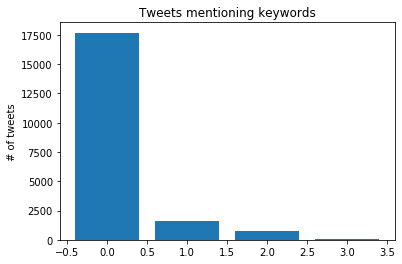

In [8]:
# 키워드 빈도 분석하기

def get_keywords(dataframe):
    keywords = []
    dataframe = dataframe.fillna("")
    text = dataframe["text"]
    if "superbowl" in text:
        keywords.append("superbowl")
    if "super bowl" in text:
        keywords.append("super bowl")
    return ",".join(keywords)

file["keyword"] = file.apply(get_keywords,axis=1)

# barplot 그리기

import matplotlib.pyplot as plt

counts = file["keyword"].value_counts()
plt.bar(range(len(counts)), counts)
plt.title("Tweets mentioning keywords")
plt.ylabel("# of tweets")
plt.show()

In [9]:
print(counts)

                        17684
superbowl                1617
super bowl                783
superbowl,super bowl       99
Name: keyword, dtype: int64


barplot을 그릴 때에는 파이썬의 visualization package 중 가장 유명한 matplotlib을 사용했다.

스포 가 단일로 포함된 트윗이 14,782개로 가장 많았고, 그 뒤로 어벤져스 단일이 6,902개 , 그리고 어벤져스 와 스포 모두 포함된 트윗이 1,248개 로 파악된다.

이번에는 어벤져스 개봉일이 다가오면서 변화하는 트윗의 빈도를 출력해 보자.

In [ ]:
# 날짜별 빈도 분석하기

counts = df_tweet["date"].value_counts().sort_index()

plt.title("Tweets mentioning keywords in time series")
plt.ylabel("# of tweets")
counts.plot(kind = 'bar')
print(counts)

## 